In [1]:
# Built-in libraries
from datetime import datetime
import random
import math

# Third-party libraries
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator
from statsmodels.stats.power import TTestIndPower, tt_ind_solve_power
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.stats.proportion import proportions_chisquare, confint_proportions_2indep
from scipy.stats import chi2_contingency
# Disable warnings
from warnings import filterwarnings
filterwarnings('ignore')

pd.set_option('display.max_rows', 2000)   # allow up to 2000 rows
pd.set_option('display.max_colwidth', None)

# Set seed for np random
SEED = 42
np.random.seed(SEED)

df_pretest = pd.read_csv("./Data/pretest.csv")

df_test = pd.read_csv("./Data/test_n.csv")


In [2]:

df_pretest["date"] = pd.to_datetime(df_pretest["date"], errors="coerce")
df_test["date"] = pd.to_datetime(df_test["date"], errors="coerce")

In [3]:
df_pretest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309903 entries, 0 to 309902
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   visitor_id  309903 non-null  int64         
 1   date        309903 non-null  datetime64[ns]
 2   email       31295 non-null   object        
 3   experiment  30039 non-null   object        
 4   group       30039 non-null   float64       
 5   submitted   309903 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 14.2+ MB


In [4]:
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139959 entries, 0 to 139958
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   visitor_id  139959 non-null  int64         
 1   date        139959 non-null  datetime64[ns]
 2   email       14602 non-null   object        
 3   experiment  30081 non-null   object        
 4   group       139959 non-null  int64         
 5   submitted   139959 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 6.4+ MB


<div style="margin-left:6%;width:75%;">

## 1. Daily Visitors Overview

This dataset represents **daily website traffic** for **December 1–31, 2021** (31 days total).  
Each row corresponds to the **number of visitors per day**, not sign-ups.  
The site receives roughly **10,000 visits per day**, giving a total of **≈310,000 visits** across the month.

The purpose of this analysis is to prepare for an A/B test aimed at improving the **sign-up rate** — the proportion of visitors who complete registration.

To test this, the design team introduced a visual change to the sign-up button:
- **Control:** Blue button  
- **Treatment:** Green button  

The A/B experiment will evaluate whether the new design **increases conversions** relative to the existing version.

### Why analyze daily visitors first?

Before running an A/B test, it’s important to understand:
- **Traffic volume per day**  
- **Traffic variability across the month**  
- **Expected time needed to reach the required sample size**  
- **Whether traffic is stable enough to support a balanced experiment**

A clear understanding of the incoming traffic ensures that the experiment:
- runs for an appropriate duration,  
- receives enough users in both groups, and  
- avoids bias caused by abnormal traffic spikes or dips.

In the next steps, we will visualize daily visitors, compute descriptive statistics, and check whether December traffic provides a reliable foundation for the upcoming experiment.

</div>


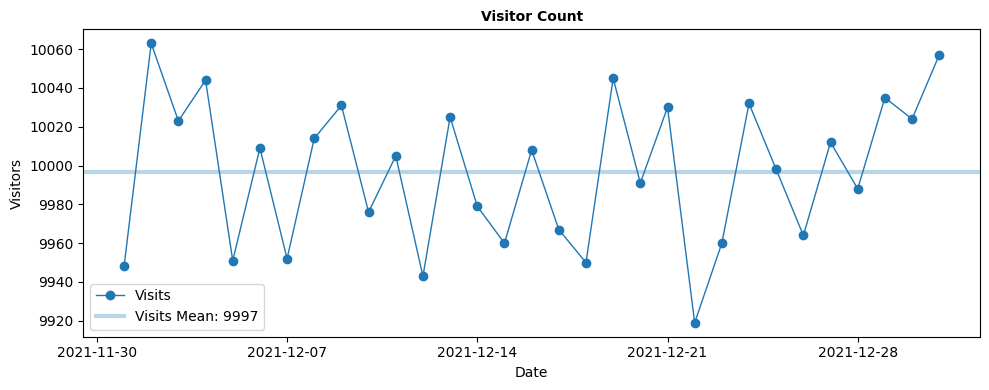

In [5]:
visits_per_day  = df_pretest.groupby('date')['submitted'].count()

visits_mean = visits_per_day.mean()

fig,ax = plt.subplots(1,1,figsize=(10,4))

ax.plot(visits_per_day.index,visits_per_day,marker='o',linewidth=1,label='Visits')
ax.axhline(visits_mean, linestyle='-', linewidth=3, alpha=0.3, label=f'Visits Mean: {visits_mean:.0f}')


# Format plot
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))

ax.legend()
plt.title('Visitor Count', fontsize=10, weight='bold')
plt.ylabel('Visitors', fontsize=10)
plt.xlabel('Date', fontsize=10)
fig.tight_layout()
plt.show()